In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings("ignore")

from function_notebook_1 import *

In [2]:
regular_18 = pd.read_csv('./data/regularseason18.csv')
regular_18 = pd.get_dummies(regular_18, columns=['w_loc'], drop_first=True)
regular_18.drop(['Unnamed: 0', 'W_TeamID', 'L_TeamID'], axis=1)

,W_Score,W_FGM,W_FGA,W_FGM3,W_FGA3,W_FTM,W_FTA,W_OR,W_DR,W_Ast,...,L_Opp_3Pr,L_Opp_TR,L_Opp_ATOr,L_Opp_Ast_%,L_Opp_Stl_%,L_Opp_Blk_%,L_Opp_TO_r,fav_win,w_loc_H,w_loc_N
0,97.000000,41.000000,74.000000,12.000000,25.000000,3.000000,11.000000,15.000000,33.000000,21.000000,...,0.194995,38.000000,1.214286,0.653846,0.130101,0.142857,0.153973,True,1,0
1,101.000000,34.000000,57.000000,5.000000,13.000000,28.000000,32.000000,12.000000,31.000000,21.000000,...,0.361493,34.000000,1.272727,0.636364,0.053050,0.120000,0.147404,True,1,0
2,95.000000,36.000000,63.000000,9.000000,22.000000,14.000000,22.000000,7.000000,28.000000,28.000000,...,0.183908,38.000000,0.384615,0.200000,0.048736,0.060606,0.166134,True,1,0
3,85.000000,33.000000,68.000000,4.000000,18.000000,15.000000,19.000000,14.000000,37.000000,13.000000,...,0.356313,41.000000,1.384615,0.562500,0.094244,0.053571,0.167634,True,1,0
4,66.000000,19.000000,62.000000,4.000000,16.000000,24.000000,39.000000,14.000000,32.000000,7.000000,...,0.297223,41.000000,0.812500,0.500000,0.079708,0.066667,0.200188,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,75.030303,26.454545,58.363636,7.393939,20.636364,14.727273,21.393939,13.181818,25.909091,16.212121,...,0.317080,31.593750,0.832941,0.518302,0.063188,0.040569,0.170633,True,0,1
5193,77.032258,27.612903,56.870968,10.838710,27.612903,10.967742,13.806452,6.935484,25.903226,17.096774,...,0.252916,33.806452,0.717742,0.485014,0.069337,0.049895,0.203830,False,0,1
5194,74.419355,26.451613,57.419355,9.258065,23.806452,12.258065,18.064516,8.677419,24.903226,12.935484,...,0.386439,35.843750,0.937634,0.540273,0.082115,0.041365,0.170537,True,0,1
5195,76.727273,27.121212,57.818182,5.393939,15.060606,17.090909,24.666667,12.121212,26.666667,13.545455,...,0.308398,34.406250,0.773333,0.484680,0.070653,0.056131,0.177744,False,0,1


In [3]:
X = regular_18.drop('fav_win', axis=1)
y = regular_18.fav_win
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [4]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [5]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Logistic Regression

In [6]:
log_feat=feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)
X_train_best_log = X_train_scaled[log_feat]
X_test_best_log = X_test_scaled[log_feat]

Penalty: l2
Solver: newton-cg
Mean Cross-Val Score: 0.8602350041655097
Train Mean Accuracy: 0.8624007697859033
Test Mean Accuracy: 0.8394230769230769
Recall Score: 0.9177718832891246
Precision Score: 0.8682559598494354
F1 Score: 0.8923275306254028


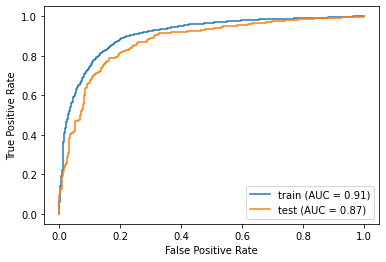

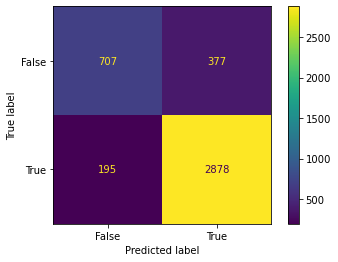

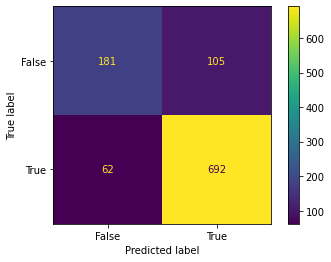

In [7]:
logreg(X_train_best_log, X_test_best_log, y_train, y_test)

### KNN

In [8]:
knn(X_train_scaled, X_test_scaled, y_train, y_test)

Number of Neighbors: 7
Metric: minkowski
Weights: distance
Mean Cross-Val Score: 0.8361809219661206


AttributeError: 'function' object has no attribute 'score'

### Decision Tree

In [9]:
dtree_feats=feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)

In [10]:
X_train_best_dtree=X_train[dtree_feats]
X_test_best_dtree=X_test[dtree_feats]

Max Depth: 10
Min Sample Split: 15
criterion: gini
Mean Cross-Val Score: 0.7690546028880867
Train Mean Accuracy: 0.9220591772913158
Test Mean Accuracy: 0.7711538461538462
Recall Score: 0.8408488063660478
Precision Score: 0.8430851063829787
F1 score: 0.8419654714475432


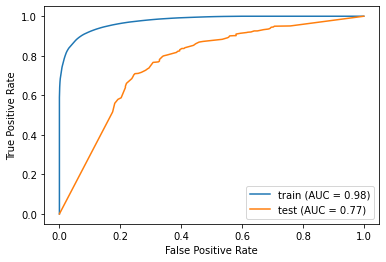

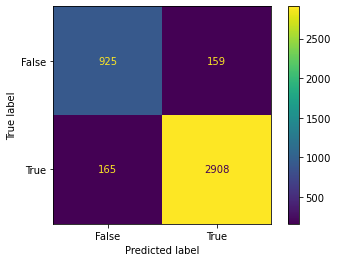

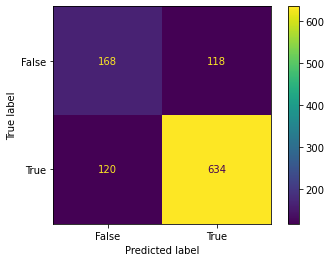

In [11]:
dtree(X_train_best_dtree, X_test_best_dtree, y_train, y_test)

### Random Forest

In [12]:
random_forest_feat=feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_rforest=X_train_scaled[random_forest_feat]
X_test_best_rforest=X_test_scaled[random_forest_feat]

KeyboardInterrupt: 

In [13]:
random_forest(X_train, X_test, y_train, y_test, cv=5)

KeyboardInterrupt: 

### Bagging Classifier

In [17]:
bagged(X_train, X_test, y_train, y_test, cv=5)

Dec Tree Max Depth: 2
Dec Tree Criterion: gini
Bagging Max Samples: 1
Bag Max Features: 1
# of Base Estimators: 10


NameError: name 'bagging' is not defined

### XGboost

In [ ]:
xgboost(X_train, X_test, y_train, y_test, cv=5)